In [ ]:
#필요한 라이브러리를 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#B-S formula
def european_option(S,K,T,r,sigma,option_type):

  d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)

  if option_type == 'call':
    V = S * stats.norm.cdf(d1) - K * np.exp(-r * T) * stats.norm.cdf(d2)
  elif option_type == 'put':
    V = -S * stats.norm.cdf(-d1) + K * np.exp(-r * T) * stats.norm.cdf(-d2)

  return V


In [ ]:
S = 100
K = 100
r = 0.01
T = 1
sigma = 0.25

In [ ]:
print('콜옵션 가격:',european_option(S,K,T,r,sigma,'call'))
print('풋옵션 가격:',european_option(S,K,T,r,sigma,'put'))

콜옵션 가격: 10.403539152996622
풋옵션 가격: 9.408522527913433


In [ ]:
#B-S 시각화
T = np.linspace(0,1,100)
S = np.linspace(0,200,100)
T,S = np.meshgrid(T,S)

Call_value = european_option(S,K,T,r,sigma,'call')
Put_value = european_option(S,K,T,r,sigma,'put')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


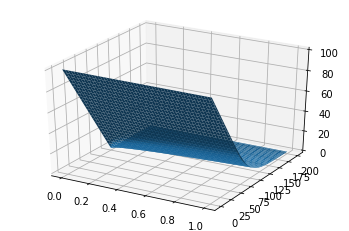

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(T,S,Put_value);

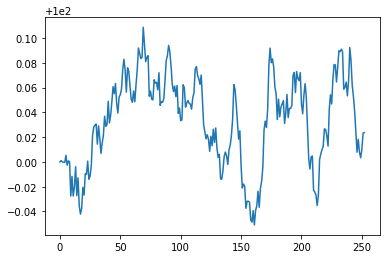

In [ ]:
#Wiener Process
S0 = 100
T = 1
D = 252
dt = T/D
sigma = 0.2

S = np.zeros(D+1)
S[0] = S0

for t in range(1,D+1):
  S[t] = S[t-1] + sigma * np.sqrt(dt) * np.random.randn()

plt.plot(S)

In [ ]:
#로그노말 분포를 따르는 주식의 만기시점 가치 모델링
S0 = 100
mu = 0.1
sigma = 0.2
T = 1
D = 252
dt = T/D
N = 10000

In [ ]:
#Monte Carlo Simulation
S = np.zeros((D+1,N))
S[0] = S0

for t in range(1,D+1):
  S[t] = S[t-1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.randn(N))

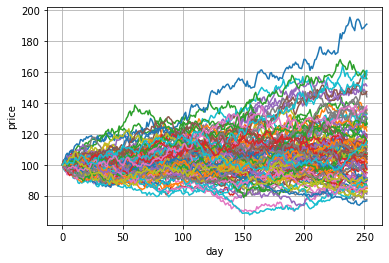

In [ ]:
plt.plot(S[:,:100])
plt.xlabel('day')
plt.ylabel('price')
plt.grid(True)

In [ ]:
#Histogram을 통한 분포 확인
St = S0 * np.exp((mu - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.randn(N))

print(St)

[168.19710166 106.93677569  78.29675102 ... 106.11790797 140.53862189
  73.64928736]


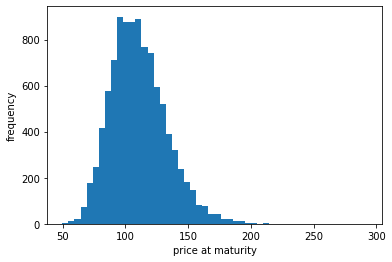

In [ ]:
plt.hist(St,bins=50)
plt.xlabel('price at maturity')
plt.ylabel('frequency');